# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [24]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [25]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Guayaquil'
    solution = 'Ambato'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Guayaquil', 'Ambato']


# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo


Definiendo el volor de nodos n = 4
Donde Total de posiciones es: 2^4=16
Optenemos como resultado:
$$\begin{equation*}
b =
\frac{{4}} {16}
\end{equation*}$$

$$\begin{equation*}
b =
\frac{{1}} {4}{=0,25}
\end{equation*}$$# Agregar la solucion en markdown (Informe)

In [26]:

import math
n = 4
d = pow(pow(n,1),2)
b = ((math.ceil(n))/(math.ceil(d)))
print("Ramificación = ", str(b))

Ramificación =  0.25


## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

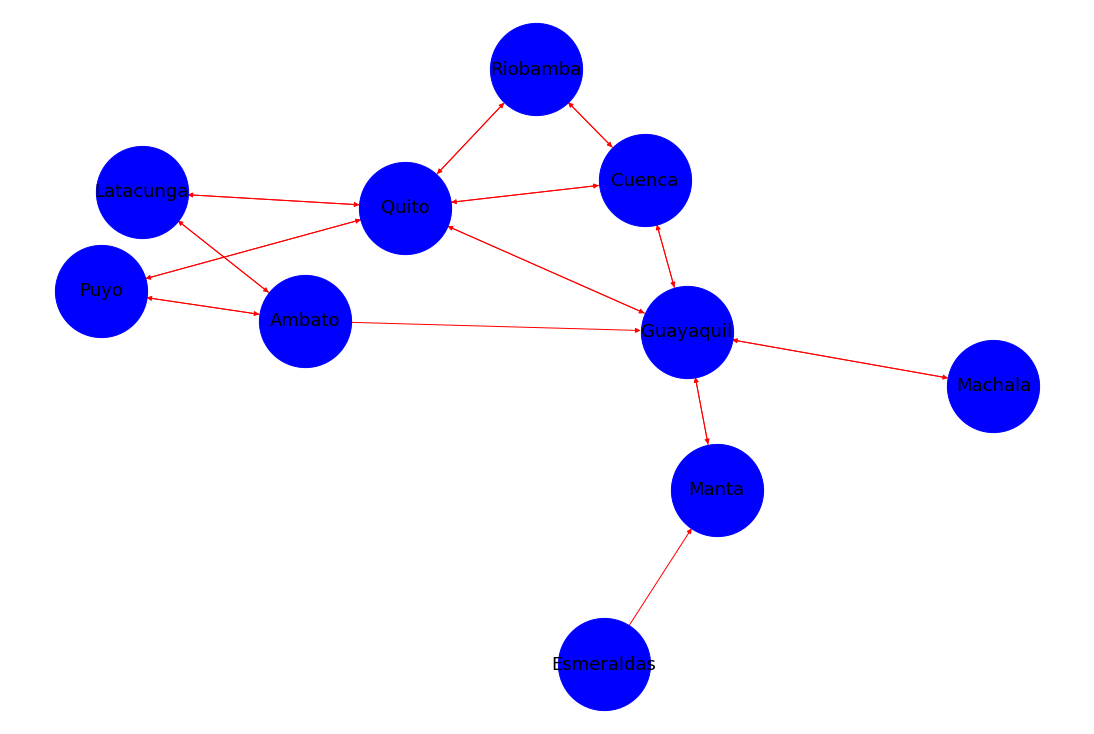

In [39]:
import csv
from os import remove
import networkx as nx
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

connections = {
    'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
    'Latacunga': {'Ambato', 'Quito'},
    'Esmeraldas': {'Manta'},
    'Manta': {'Guayaquil'},
    'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
    'Riobamba': {'Cuenca', 'Quito'},
    'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
    'Puyo': {'Ambato', 'Quito'},
    'Machala': {'Guayaquil'},
    'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'},
}
lista = []
lista.append('origin')
lista.append('destination')

#Metodo llenar las coenciones en lista
def itemsLlave(nombreLlave,llave):
        listaV = connections[llave]
        for i in listaV:
                lista.append(nombreLlave)
                lista.append(i)

def escribriDatos(lista):
    file = open("ciudades.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista)
    file.close()
    
    
for k, i in connections.items():
       itemsLlave(k,k)


    
lista_nueva = []
x = 0
cont = 0
valDividir = False
while x < len(lista):
    if cont== 2:
            escribriDatos(lista_nueva)
            cont = 0
            lista_nueva = []
    if cont != 2:
        lista_nueva.append(lista[x])
        cont=cont+1

    x=x+1

listCiudades = pd.read_csv("ciudades.csv", encoding="ISO-8859–1")
DG=nx.DiGraph()
for row in listCiudades.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"])
    
nx.draw_spring(DG,
                 node_color="blue",
                 edge_color="red",
                 font_size=18,
                 width=1, 
                 with_labels=True, 
                 node_size=8500,
)
remove("ciudades.csv")

['Guayaquil', 'Ambato']


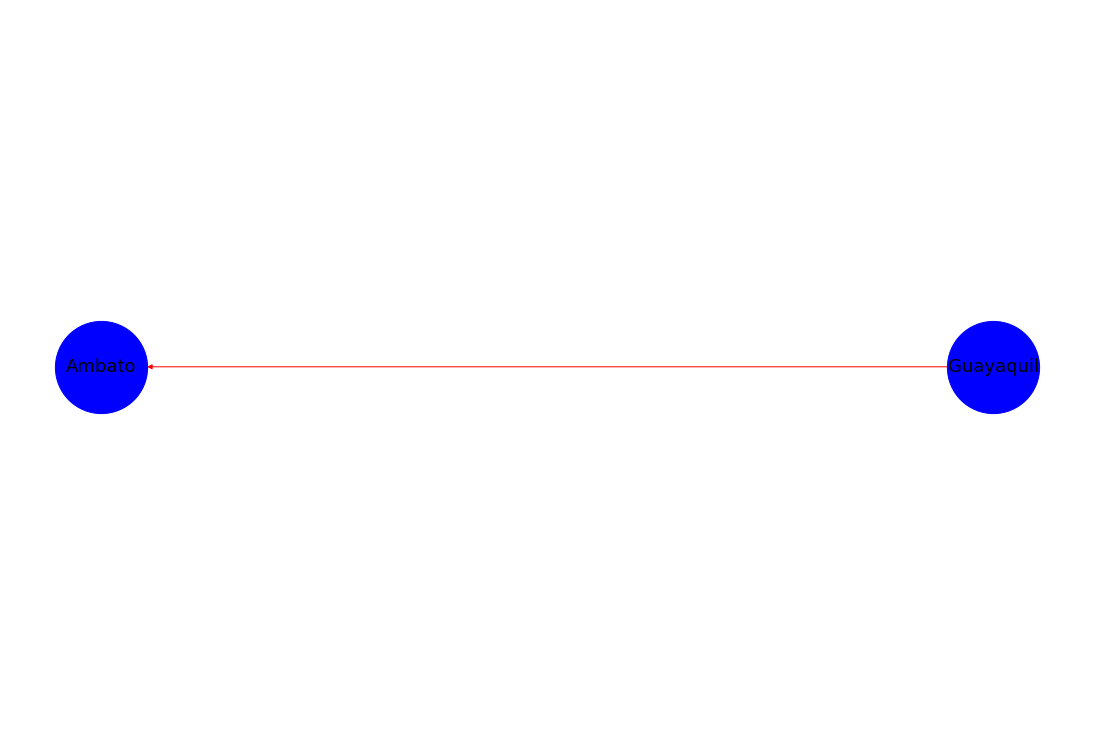

In [28]:
import csv
from os import remove

lista1 = []
lista1.append('origin')
lista1.append('destination')
file = open("ciudades.csv", "a")
spamreader = csv.writer(file)
spamreader.writerow(lista1)
file.close()


lista_nueva = []
x = 0
cont = 0
while x < len(result):
    if cont != 2:
        lista_nueva.append(result[x])
        cont = cont + 1

    if cont == 2:
        escribriDatos(lista_nueva)
        cont = 0
        lista_nueva = []
        x = x -1

    x = x + 1
    
sol_lista = pd.read_csv("ciudades.csv", encoding="ISO-8859–1")
DG=nx.DiGraph()
for row in sol_lista.iterrows():
    DG.add_edge(row[1][0],
                row[1][1])
    
nx.draw_circular(DG,
                 node_color="blue",
                 edge_color="red",
                 font_size=18,
                 width=1, 
                 with_labels=True, 
                 node_size=8500,
)

remove("ciudades.csv")
print(result)

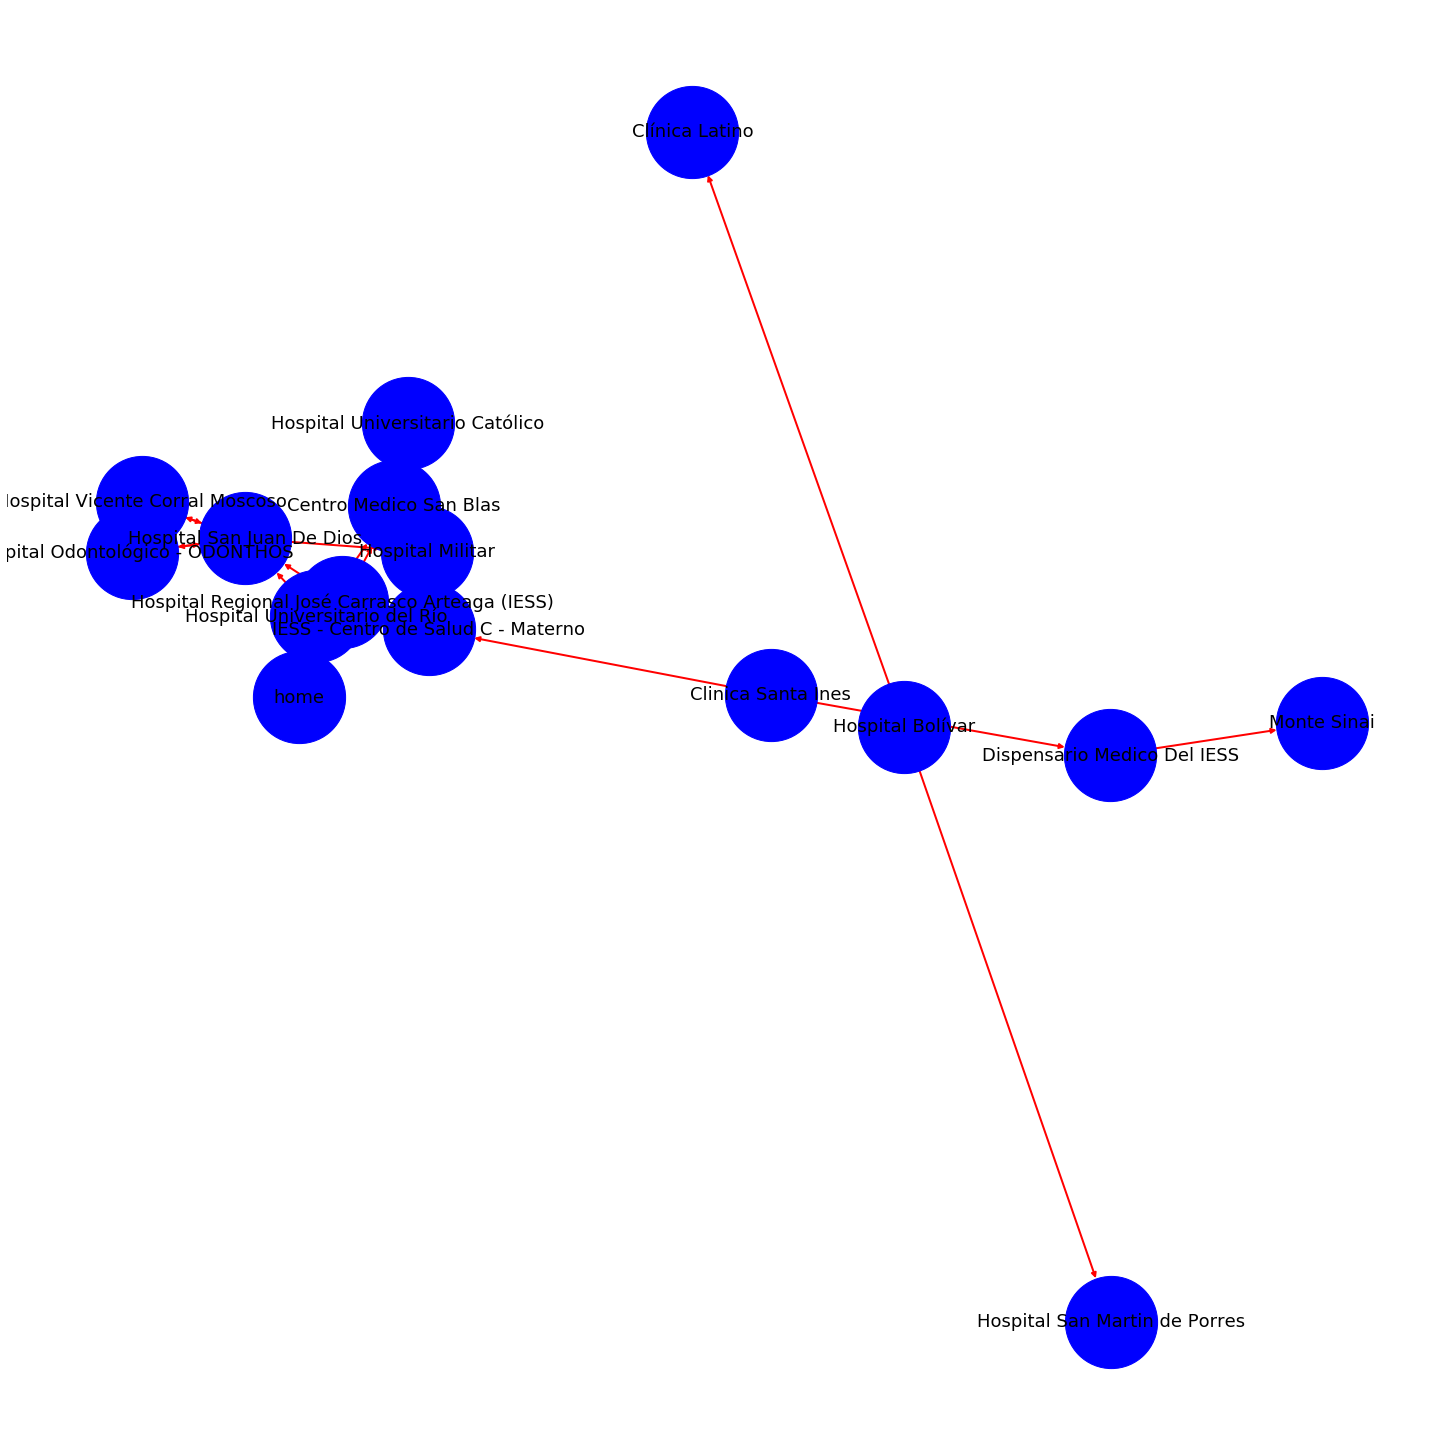

In [38]:
connections = {
     'home':{'Hospital Regional José Carrasco Arteaga (IESS)','Hospital Universitario del Río'},
    'Hospital Regional José Carrasco Arteaga (IESS)':{'home','Hospital San Juan De Dios','IESS - Centro de Salud C - Materno','Centro Medico San Blas'},   
    'Hospital Universitario del Río':{'home','Hospital San Juan De Dios','IESS - Centro de Salud C - Materno','Centro Medico San Blas'},
    'Dispensario Medico Del IESS': {'Clinica Santa Ines', 'Hospital Bolívar'},
    'Hospital San Juan De Dios': {'Hospital Militar', 'Hospital Vicente Corral Moscoso', 'Hospital Odontológico - ODONTHOS'},
    'IESS - Centro de Salud C - Materno': {'Hospital Militar', 'Hospital Regional José Carrasco Arteaga (IESS)'}, 
    'Hospital Odontológico - ODONTHOS': {'Hospital San Juan De Dios', 'Hospital Vicente Corral Moscoso'},
    'Hospital Vicente Corral Moscoso': {'Hospital Odontológico - ODONTHOS', 'Hospital San Juan De Dios'},
    'Clinica Santa Ines': {'IESS - Centro de Salud C - Materno','Dispensario Medico Del IESS'},
    'Dispensario Medico Del IESS': {'Monte Sinai'},
    'Centro Medico San Blas': {'Hospital Militar', 'Hospital Universitario Católico'},
    'Hospital Militar':{'Hospital Universitario Católico'},
    'Hospital Universitario Católico': {'Centro Medico San Blas'},
    'Hospital Bolívar': {'Dispensario Medico Del IESS', 'Hospital San Martin de Porres', 'Clínica Latino'},   
}

plt.rcParams['figure.figsize'] = (20.0, 20.0)

lista = []
lista.append('origin')
lista.append('destination')


    
for k, i in connections.items():
       itemsLlave(k,k)


    
lista_nueva = []
x = 0
cont = 0
valDividir = False
while x < len(lista):
    if cont== 2:
            escribriDatos(lista_nueva)
            cont = 0
            lista_nueva = []
    if cont != 2:
        lista_nueva.append(lista[x])
        cont=cont+1

    x=x+1

listCiudades = pd.read_csv("ciudades.csv", encoding="ISO-8859–1")
DG=nx.DiGraph()
for row in listCiudades.iterrows():
    DG.add_edge(row[1][0],
                row[1][1])
    
nx.draw_spring(DG,
                 node_color="blue",
                 edge_color="red",
                 font_size=18,
                 width=2, 
                 with_labels=True, 
                 node_size=8500,
)
remove("ciudades.csv")

['home', 'Hospital Universitario del Río', 'IESS - Centro de Salud C - Materno']
['home', 'Hospital Universitario del Río', 'IESS - Centro de Salud C - Materno']


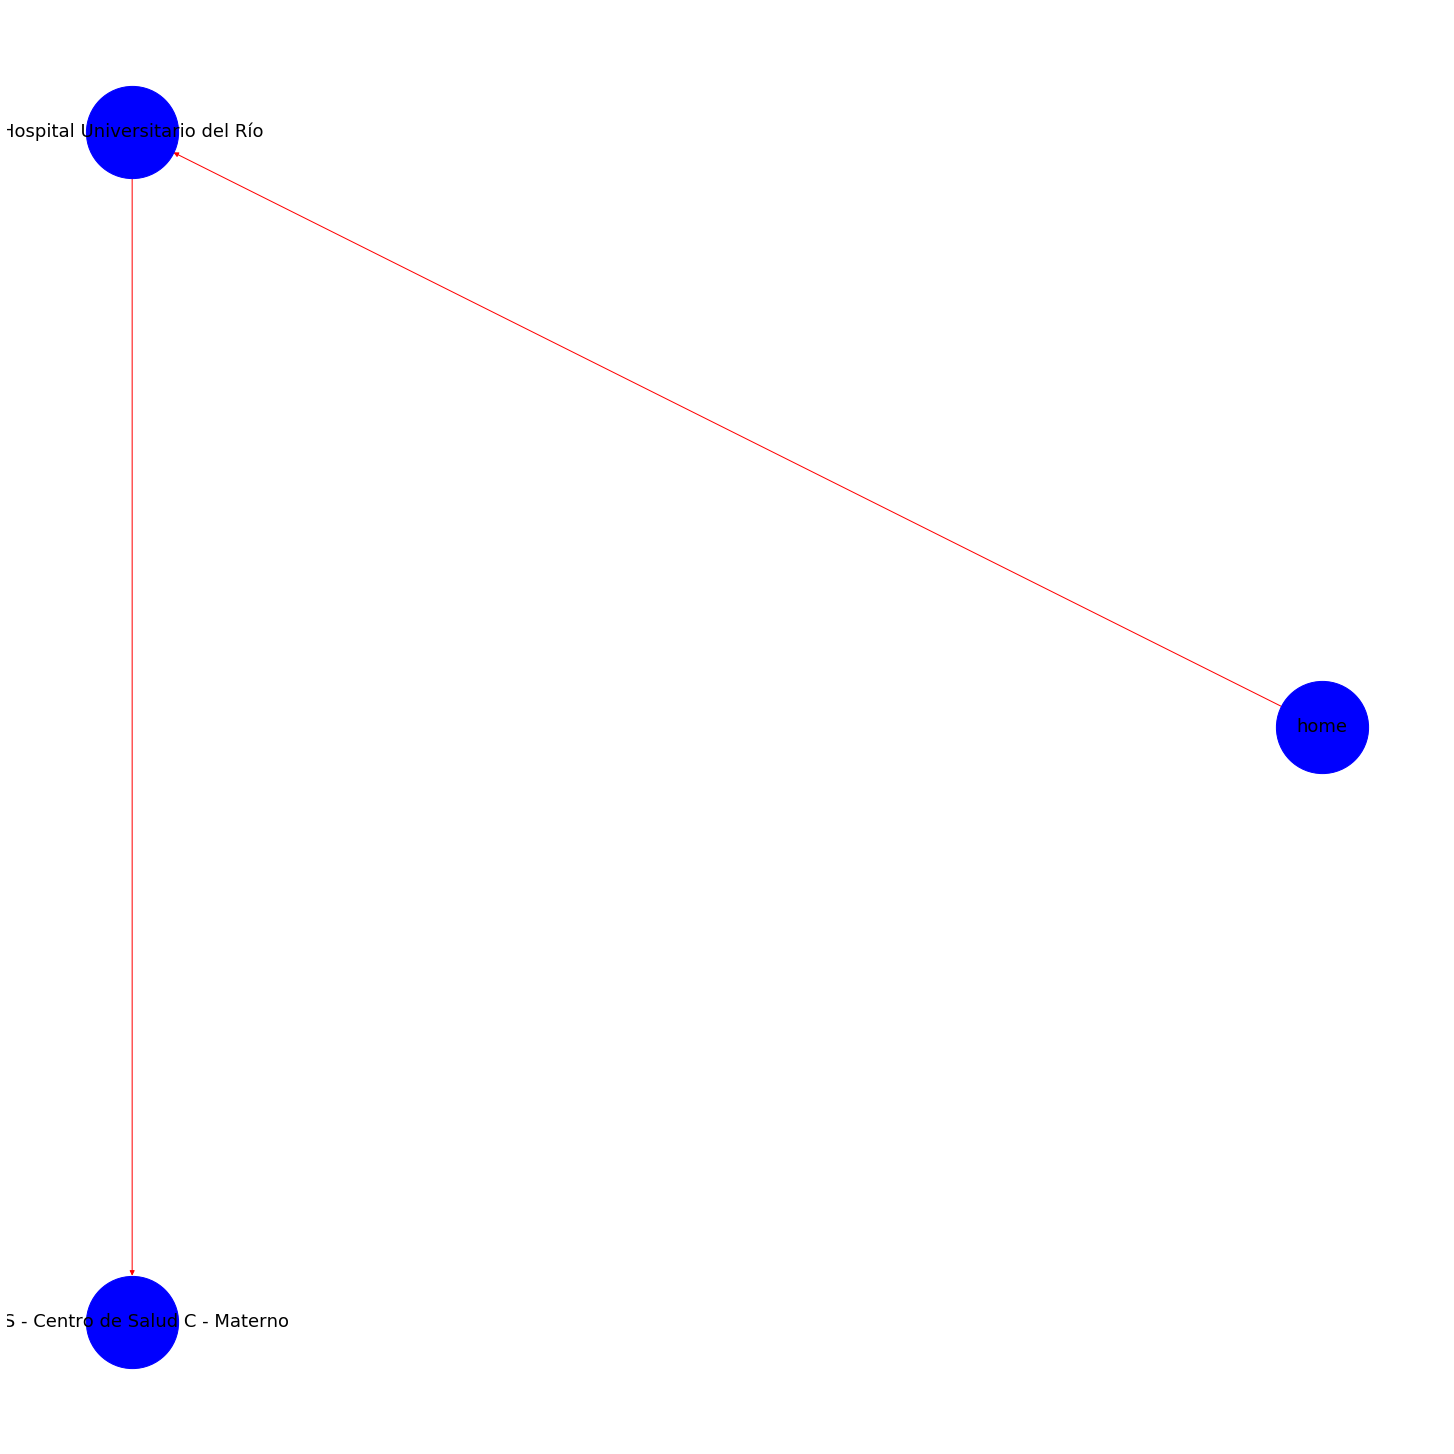

In [37]:
if __name__ == "__main__":
    connections = {
     'home':{'Hospital Regional José Carrasco Arteaga (IESS)','Hospital Universitario del Río'},
    'Hospital Regional José Carrasco Arteaga (IESS)':{'home','Hospital San Juan De Dios','IESS - Centro de Salud C - Materno','Centro Medico San Blas'},   
    'Hospital Universitario del Río':{'home','Hospital San Juan De Dios','IESS - Centro de Salud C - Materno','Centro Medico San Blas'},
    'Dispensario Medico Del IESS': {'Clinica Santa Ines', 'Hospital Bolívar'},
    'Hospital San Juan De Dios': {'Hospital Militar', 'Hospital Vicente Corral Moscoso', 'Hospital Odontológico - ODONTHOS'},
    'IESS - Centro de Salud C - Materno': {'Hospital Militar', 'Hospital Regional José Carrasco Arteaga (IESS)'}, 
    'Hospital Odontológico - ODONTHOS': {'Hospital San Juan De Dios', 'Hospital Vicente Corral Moscoso'},
    'Hospital Vicente Corral Moscoso': {'Hospital Odontológico - ODONTHOS', 'Hospital San Juan De Dios'},
    'Clinica Santa Ines': {'IESS - Centro de Salud C - Materno','Dispensario Medico Del IESS'},
    'Dispensario Medico Del IESS': {'Monte Sinai'},
    'Centro Medico San Blas': {'Hospital Militar', 'Hospital Universitario Católico'},
    'Hospital Militar':{'Hospital Universitario Católico'},
    'Hospital Universitario Católico': {'Centro Medico San Blas'},
    'Hospital Bolívar': {'Dispensario Medico Del IESS', 'Hospital San Martin de Porres', 'Clínica Latino'},   
}

    init_state = 'home'
    solution = 'IESS - Centro de Salud C - Materno'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

        lista1 = []
lista1.append('origin')
lista1.append('destination')
file = open("ciudades.csv", "a")
spamreader = csv.writer(file)
spamreader.writerow(lista1)
file.close()


lista_nueva = []
x = 0
cont = 0
while x < len(result):
    if cont != 2:
        lista_nueva.append(result[x])
        cont = cont + 1

    if cont == 2:
        escribriDatos(lista_nueva)
        cont = 0
        lista_nueva = []
        x = x -1

    x = x + 1
    
sol_lista = pd.read_csv("ciudades.csv", encoding="ISO-8859–1")
DG=nx.DiGraph()
for row in sol_lista.iterrows():
    DG.add_edge(row[1][0],
                row[1][1])
    
nx.draw_circular(DG,
                 node_color="blue",
                 edge_color="red",
                 font_size=18,
                 width=1, 
                 with_labels=True, 
                 node_size=8500,
)

remove("ciudades.csv")
print(result)


In [13]:
n = 17
d = pow(pow(n,1),2)
b = ((math.ceil(n))/(math.ceil(d)))
print("Ramificación = ", str(b))

Ramificación =  0.058823529411764705


In [14]:
n = 17
d = pow(pow(n,1),2)
b = ((math.ceil(n))/(math.ceil(d)))
o = (pow(b,n))
print("Complejidad Temporal= ", str(o))

Complejidad Temporal=  1.2088386483023965e-21


In [15]:
n = 17
d = pow(pow(n,1),2)
b = ((math.ceil(n))/(math.ceil(d)))
o = (b*n)
print("Complejidad Espacial= ", str(o))

Complejidad Espacial=  1.0


# Conclusiones

por medio de la busqueda por amplietud se puedo recorrer nivel a niver haciendo un barrido completo nivel a nivel si el dono objetivo se encuentra en un nivel cercano este se puede encontra muy rapido 